<a href="https://colab.research.google.com/github/sdw1621/tensorflow_hangi_uni/blob/main/DL_framework_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

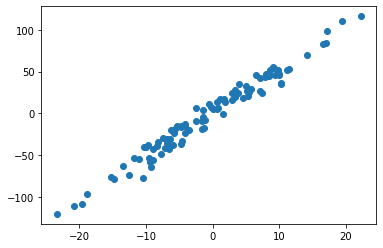

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
# dataset generation
data = np.zeros((100,2))
 
for i in range(len(data)):
  data[i][0] = 10*np.random.randn(1)
  data[i][1] = 5*data[i,0] + 2 + 10*np.random.randn(1)
 
plt.scatter(data[:,0], data[:,1])
plt.show()

iteration: 0 loss= 18264.377720973065 w= -8.827057290168092 b= 19.884516949830513
iteration: 100 loss= 86.15638495730687 w= 5.015077463995294 b= 4.098347399434175
iteration: 200 loss= 80.34176558641043 w= 5.036012983909575 b= 1.9840244397489553
iteration: 300 loss= 80.23586884905892 w= 5.038758009448568 b= 1.6986900357385202
iteration: 400 loss= 80.23394021277456 w= 5.039128456527535 b= 1.6601831836720506
iteration: 500 loss= 80.23390508763259 w= 5.0391784496255845 b= 1.654986552503858
iteration: 600 loss= 80.23390444791868 w= 5.039185196364866 b= 1.6542852493837896
iteration: 700 loss= 80.23390443626789 w= 5.039186106860371 b= 1.6541906061331337
iteration: 800 loss= 80.2339044360557 w= 5.039186229734847 b= 1.6541778337032973
iteration: 900 loss= 80.23390443605183 w= 5.039186246317178 b= 1.6541761100202799
iteration: 1000 loss= 80.2339044360518 w= 5.03918624855502 b= 1.6541758774033706


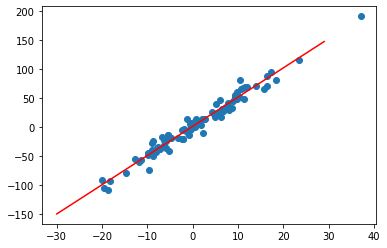

In [ ]:
# y = 5x + 2 --> y = wx + b : find w and b
# error = true - pred
# MSE loss = (true - pred)**2
def loss_function (w,b):
  return sum((y-w*x-b)**2 for x, y in data)/len(data)
 
def w_grad_loss(w,b):
  return sum(2*(y-w*x-b)*(-x) for x,y in data )/len(data)
 
def b_grad_loss(w,b):
  return sum(2*(y-w*x-b)*(-1) for x,y in data )/len(data)
 
# initial parameters
w = 20.00001
b = 20.00001
 
# learning rate
lr= 0.01 
 
fig = plt.figure()
for i in range(1000+1):
  w = w - lr*w_grad_loss(w,b)
  b = b - lr*b_grad_loss(w,b)
  if i%100 == 0:
    print('iteration:', i, 'loss=', loss_function(w,b), 'w=', w, 'b=', b)
 
# plot result
x_coor = []
y_coor = []
iter=0
for i in range(-30,30,1):
  x_coor.append (i)
  y_coor.append (w*x_coor[iter] + b)
  iter+=1
 
plt.plot(x_coor, y_coor, 'r')
plt.scatter(data[:,0], data[:,1])
plt.show()

iteration: 0 loss= 18266.861407693243 w= -8.828009591310295 b= 19.88452421697391
iteration: 10 loss= 2696.259953158103 w= -0.11926955514238458 b= 16.521811797139232
iteration: 20 loss= 548.4918282322865 w= 3.084913087931252 b= 13.803581581199776
iteration: 30 loss= 221.42852936786483 w= 4.270262664989584 b= 11.59121957895567
iteration: 40 loss= 151.6190835644908 w= 4.714019236179777 b= 9.784983976828723
iteration: 50 loss= 124.92475471267782 w= 4.884402428448194 b= 8.30825926570898
iteration: 60 loss= 109.74763076583179 w= 4.953229735094336 b= 7.100175584468811
iteration: 70 loss= 99.94715185711325 w= 4.983693674430068 b= 6.111584910184316
iteration: 80 loss= 93.43201616768285 w= 4.999152166123675 b= 5.30250646201554
iteration: 90 loss= 89.0744774793925 w= 5.008333932485154 b= 4.640306410081958
iteration: 100 loss= 86.15629346878403 w= 5.014577827300169 b= 4.098307101211727


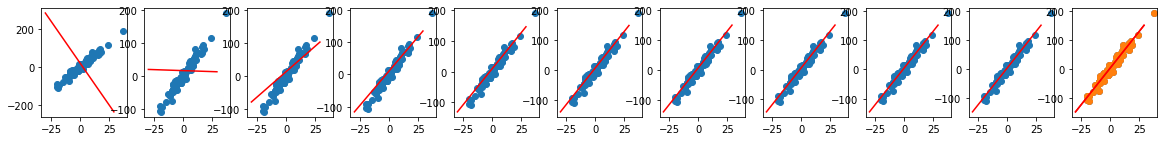

In [ ]:
# y = 5x + 2 --> y = ax + c : find a and c
# error = true - pred
# MSE loss = (true - pred)**2
 
def loss_function (w,b):
  return sum((y-w*x-b)**2 for x, y in data)/len(data)
 
def grad_loss(w,b, w_h, b_h):
  return  (loss_function(w+w_h,b+b_h) - loss_function(w,b))/h 
  
w = 20.00001
b = 20.00001
lr= 0.01 # learning rate
h = 0.001
 
plt.figure(figsize=(20,2))
plt_cnt=1

for i in range(100+1):
  w = w - lr*grad_loss(w, b, h, 0)
  b = b - lr*grad_loss(w, b, 0, h)
  
  # 100회 반복마다 손실값 및 w, b 출력
  if i%10 == 0:
    print('iteration:', i, 'loss=', loss_function(w,b), 'w=', w, 'b=', b)
    iter=0
    x_coor = []
    y_coor = []
    plt.subplot(1,11,plt_cnt)
    for j in range(-30,30,1):
      x_coor.append (j)
      y_coor.append (w*x_coor[iter] + b)
      iter+=1 
    plt.plot(x_coor, y_coor, 'r')
    plt.scatter(data[:,0], data[:,1])
    plt_cnt+=1

x_coor = []
y_coor = []
iter=0
for i in range(-30,30,1):
  x_coor.append (i)
  y_coor.append (w*x_coor[iter] + b)
  iter+=1 
 
plt.plot(x_coor, y_coor, 'r')
plt.scatter(data[:,0], data[:,1], cmap='b')
plt.show()


[  5.75402572  17.04068321  -6.88922255   1.68510832   8.50612896
   7.46474202   7.14606172   5.17008161   3.19037058  -7.20561641
 -10.06200673  11.49422783   5.4057819    3.88284056  -5.88412103
 -11.79940192  -4.16055473 -11.01202637   9.03826467  -5.84529808
  -9.75287491   8.53716833  17.19817079   9.41984386   0.09373016
   3.38549037   2.94873747  -5.63041639  -8.41003792   8.38587753
  -4.12135404  -7.46070052  10.23645078   0.60446349  -8.18602967
 -19.60160315  -4.61262595  -4.16431432   3.38773589  22.30454586
  -8.89092451  -3.53361294   9.90738958  -2.50560456  11.12276581
   2.94954225   9.23677589  -7.72242184  -0.59917678   7.05309125
  -6.59873204   1.87266867   3.98682816  -6.21275824   0.81561371
  19.46649628   9.77042488  -9.39460604  -1.55023468   1.05749614
  -6.90496356  -6.32231055  -1.27041556  -2.48144426   8.13405275
 -12.61093147 -20.80101158  10.27844043  -4.78580715  -8.95365948
 -23.41997079   5.39499043  -9.22859587   0.72906659   4.50510915
  -0.26566

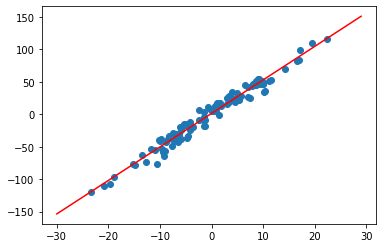

In [ ]:
import tensorflow as tf
 
# linear regression model 설계
class LinearModel:
    
    def __init__(self):
        self.w = tf.Variable(20.0)
        self.b = tf.Variable(20.0)

    def __call__(self, x):
        return self.w* x + self.b

x = data[:,0]
y = data[:,1]

print(x,y)

# 손실함수 정의: MSE
def loss(y, pred):
    return tf.reduce_mean(tf.square(y - pred))
 
# 학습모델 정의
def train(linear_model, x, y, lr=0.01):
    with tf.GradientTape() as t:
        current_loss = loss(y, linear_model(x))

    grad_w, grad_b = t.gradient(current_loss, [linear_model.w, linear_model.b])
    linear_model.w.assign_sub(lr * grad_w)
    linear_model.b.assign_sub(lr * grad_b)

# linear gression 모델 선언
linear_model = LinearModel()

for i in range(1000+1):
    w=linear_model.w.numpy() 
    b=linear_model.b.numpy()
    real_loss = loss(y, linear_model(x))
    train(linear_model, x, y, lr=0.01)
  
    # 100회 반복마다 손실값 및 w, b 출력
    if i%100 == 0:
        print('iteration: ', i, 'loss=', real_loss, 'w=', w, 'b=', b)
 
# 결과 출력
x_coor = []
y_coor = []
iter=0

for i in range(-30,30):
  x_coor.append (i)
  y_coor.append (w*x_coor[iter] + b) 
  iter+=1
 
plt.plot(x_coor, y_coor, 'r')
plt.scatter(data[:,0], data[:,1])
plt.show()

[<tf.Variable 'dense_17/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[5.1683955]], dtype=float32)>, <tf.Variable 'dense_17/bias:0' shape=(1,) dtype=float32, numpy=array([1.3686304], dtype=float32)>]


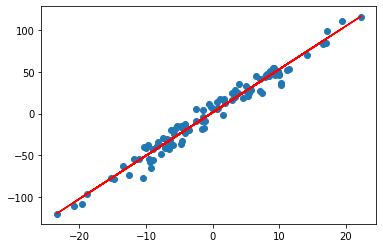

In [ ]:
import tensorflow as tf

# KERAS를 이용한 linear regression model 설계
model = tf.keras.Sequential()  
model.add(tf.keras.layers.Dense(1, activation='linear'))

# 학습 기준 확정
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

# 학습 데이터 텐서 포맷으로 변환
train_x = tf.expand_dims(data[:,0], axis=1)
train_y = tf.expand_dims(data[:,1], axis=1)

# 학습 반복회수 설정
epochs = 1000
num_batch = 100

# 모델 학습
model.fit(train_x, train_y, epochs=epochs, batch_size=num_batch, verbose=0)

# 학습변수 출력
print(model.weights)
 
# 결과 출력 
plt.plot(train_x, model.predict(train_x), 'r')
plt.scatter(data[:,0], data[:,1])
plt.show()

iteration: 0 loss= tensor(1529.4794, grad_fn=<MseLossBackward0>) param= tensor([[8.0374]]) tensor([0.8928])
iteration: 100 loss= tensor(66.9610, grad_fn=<MseLossBackward0>) param= tensor([[5.1682]]) tensor([1.3081])
iteration: 200 loss= tensor(66.9573, grad_fn=<MseLossBackward0>) param= tensor([[5.1684]]) tensor([1.3607])
iteration: 300 loss= tensor(66.9572, grad_fn=<MseLossBackward0>) param= tensor([[5.1684]]) tensor([1.3676])
iteration: 400 loss= tensor(66.9572, grad_fn=<MseLossBackward0>) param= tensor([[5.1684]]) tensor([1.3685])
iteration: 500 loss= tensor(66.9572, grad_fn=<MseLossBackward0>) param= tensor([[5.1684]]) tensor([1.3686])
iteration: 600 loss= tensor(66.9572, grad_fn=<MseLossBackward0>) param= tensor([[5.1684]]) tensor([1.3686])
iteration: 700 loss= tensor(66.9572, grad_fn=<MseLossBackward0>) param= tensor([[5.1684]]) tensor([1.3686])
iteration: 800 loss= tensor(66.9572, grad_fn=<MseLossBackward0>) param= tensor([[5.1684]]) tensor([1.3686])
iteration: 900 loss= tensor(

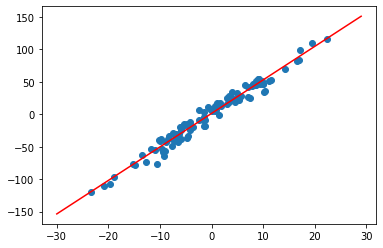

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
 
# 학습모델 정의
class Linear_Regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1) # 단일 선형 회귀이므로 input_dim=1, output_dim=1.
 
    def forward(self, x):
        return self.linear(x)
 
x = data[:,0].reshape(-1,1)
y = data[:,1].reshape(-1,1)
 
# 파이토치 포맷으로 변환
in_x = torch.FloatTensor(x)
in_y = torch.FloatTensor(y)
 
# 회귀 모델 선언
model = Linear_Regression()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.01, nesterov=True) 
weight = []
 
for i in range(1000+1):
  pred = model(in_x)
  loss = F.mse_loss(pred, in_y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
 
  # 100회 반복마다 손실값 및 w, b 출력
  if i%100 == 0:
    for param in model.parameters():
      weight.append (param.data)
    print('iteration:', i, 'loss=', loss, 'param=', weight[0], weight[1]) 
 
# 결과 출력
x_coor = []
y_coor = []
a = weight[0]
c = weight[1]
iter=0
for i in range(-30,30):
  x_coor.append (i)
  y_coor.append (a*x_coor[iter] + c)
  iter+=1 
 
plt.plot(x_coor, y_coor, 'r')
plt.scatter(data[:,0], data[:,1])
plt.show()

In [ ]:
import torch
print(torch.__version__)

1.10.0+cu111


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
from sklearn.linear_model import LinearRegression
 
X = data[:,0].reshape(-1, 1)
Y = data[:,1]
 
model = LinearRegression().fit(X, Y)
print('W=', model.coef_, 'b=',model.intercept_)

W= [4.94578182] b= 2.027345863371662
